<a href="https://colab.research.google.com/github/cgangwar11/Coding-Practice/blob/master/demo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.text import *
import spacy
import seaborn as sns
import pandas as pd
nlp = spacy.load('en')

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
data_clas = load_data('/gdrive/My Drive/imdb', 'data_clas.pkl', bs=48)

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [0]:
learn = learn.load('third_v1')

In [0]:
cat,pred,senti = learn.predict("This movie is really good")

In [54]:
nlp.tokenizer

TypeError: ignored

In [0]:
pred,senti = pred.numpy(),senti.numpy()

In [0]:
data = pd.DataFrame(columns=["Text","Postitive","Negative","Prediction"])

In [58]:
pred

array(1)

In [0]:
data.loc[1] = ["This movie is  really good",senti[1],senti[0],pred]

In [60]:
data

,Text,Postitive,Negative,Prediction
1,This movie is really good,0.831347,0.168653,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


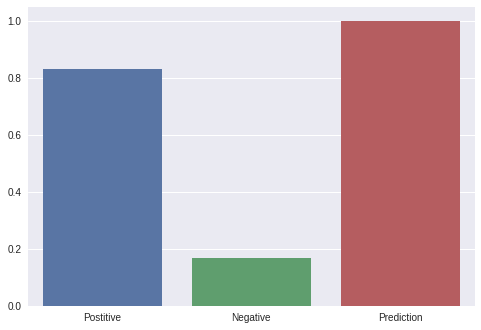

In [61]:
sns.barplot(data=data)

In [0]:
doc = nlp(corpus)
for i in doc.sents:
    print(learn.predict(i.text.lower().replace('\n',' '))[2].numpy(),i.text.lower().replace('\n',' '))
# corpus = corpus.lower()

NameError: ignored